In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, neural_network, preprocessing, ensemble
%matplotlib inline

In [16]:
df = pd.read_csv("refined_dataset.csv").sort_values(by="date")

In [17]:
df.describe()

,location_id,direction,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_21,hour_22,hour_23,hour_24,sum,rain,temperature,year,weekday,week
count,111151.00000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,...,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000
mean,545.87849,1.501363,11.871067,7.865579,5.704150,6.044705,9.887450,28.797906,83.573274,114.028439,...,56.458655,42.005398,27.865021,18.236012,1719.405125,1.334841,6.563847,2013.401625,2.983050,25.300213
std,589.28766,0.500000,33.684541,21.478568,14.161849,14.317540,24.689969,90.216812,288.812266,406.065957,...,168.064059,120.824131,78.958087,53.252970,4890.540468,4.382747,8.839309,2.344274,1.997245,14.969486
min,110.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-22.700000,2010.000000,0.000000,1.000000
25%,110.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,29.000000,-1.000000,0.800000,2011.000000,1.000000,12.000000
50%,168.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,...,4.000000,3.000000,2.000000,1.000000,115.000000,-1.000000,6.100000,2013.000000,3.000000,24.000000
75%,1403.00000,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000,9.000000,17.000000,23.000000,...,14.000000,12.000000,8.000000,6.000000,477.000000,1.700000,14.100000,2015.000000,5.000000,38.000000
max,1403.00000,2.000000,734.000000,660.000000,634.000000,222.000000,425.000000,1210.000000,2436.000000,3074.000000,...,2863.000000,2409.000000,1689.000000,1089.000000,30295.000000,52.000000,25.700000,2018.000000,6.000000,53.000000


In [18]:
df.head()

,location_id,location_name,date,direction,vehicle_type,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_22,hour_23,hour_24,sum,rain,temperature,year,weekday,week,midsummer_week
99237,1403,KEMIJÄRVI,2010-01-01,2,16 HA + PK,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,13.0,-1.0,-12.9,2010,4,53,False
57628,110,MÄNTSÄLÄ,2010-01-01,1,16 HA + PK,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,52.0,-1.0,-12.9,2010,4,53,False
57627,110,MÄNTSÄLÄ,2010-01-01,1,15 KATP,5.0,3.0,1.0,2.0,1.0,...,5.0,3.0,2.0,38.0,-1.0,-12.9,2010,4,53,False
57626,110,MÄNTSÄLÄ,2010-01-01,1,14 KAPP,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,8.0,-1.0,-12.9,2010,4,53,False
57625,110,MÄNTSÄLÄ,2010-01-01,1,13 Linja-autot,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,39.0,-1.0,-12.9,2010,4,53,False


In [19]:
df.vehicle_type.unique()

array(['16 HA + PK', '15 KATP', '14 KAPP', '13 Linja-autot', '12 KAIP',
       '11 HA-PA', '17 HA + AV'], dtype=object)

In [20]:
daily_sums = df.groupby(by=["date", "location_id"]).agg({"sum": "mean"}).reset_index()
#.plot(x="date", y="sum", ax=ax, kind="line")

In [23]:
daily_sums.head()

,date,location_id,sum
0,2010-01-01,110,780.857143
1,2010-01-01,168,988.357143
2,2010-01-01,1403,52.500000
3,2010-01-02,110,1236.928571
4,2010-01-02,168,1699.500000


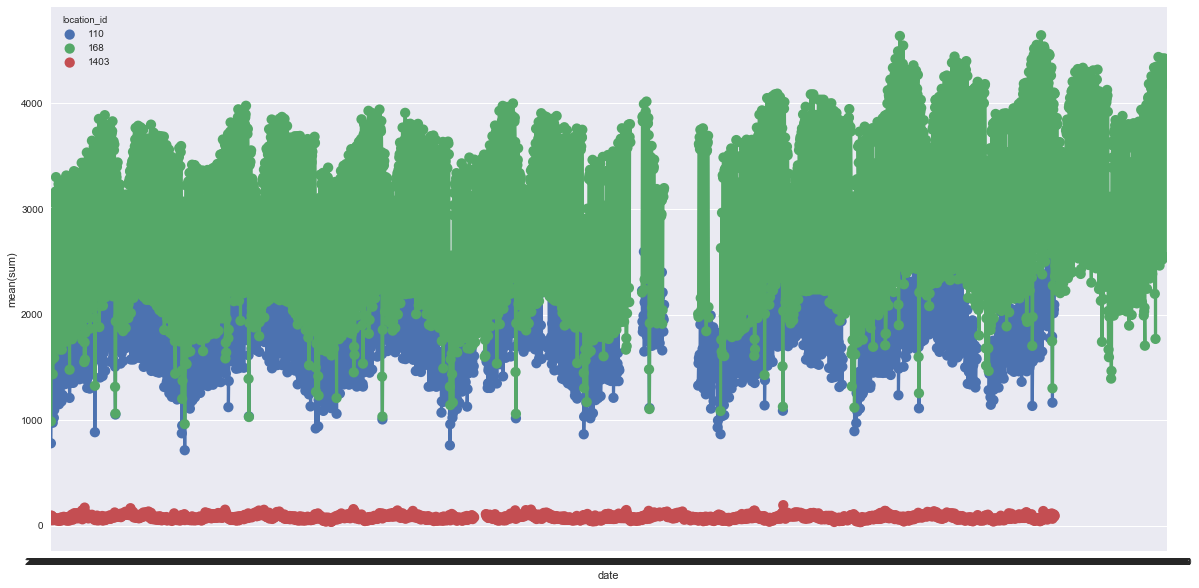

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="date", y="sum", data=daily_sums, hue="location_id", ax=ax)

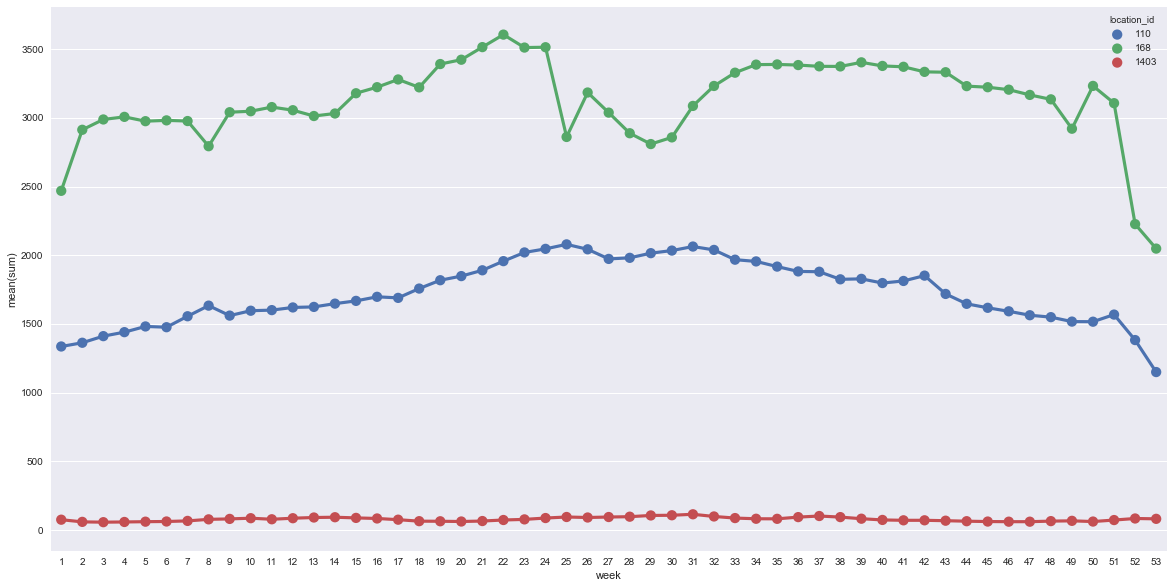

In [25]:
# compare weekly volumes in each location
weekly = df.groupby(by=["week", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="week", y="sum", hue="location_id", data=weekly, ax=ax)

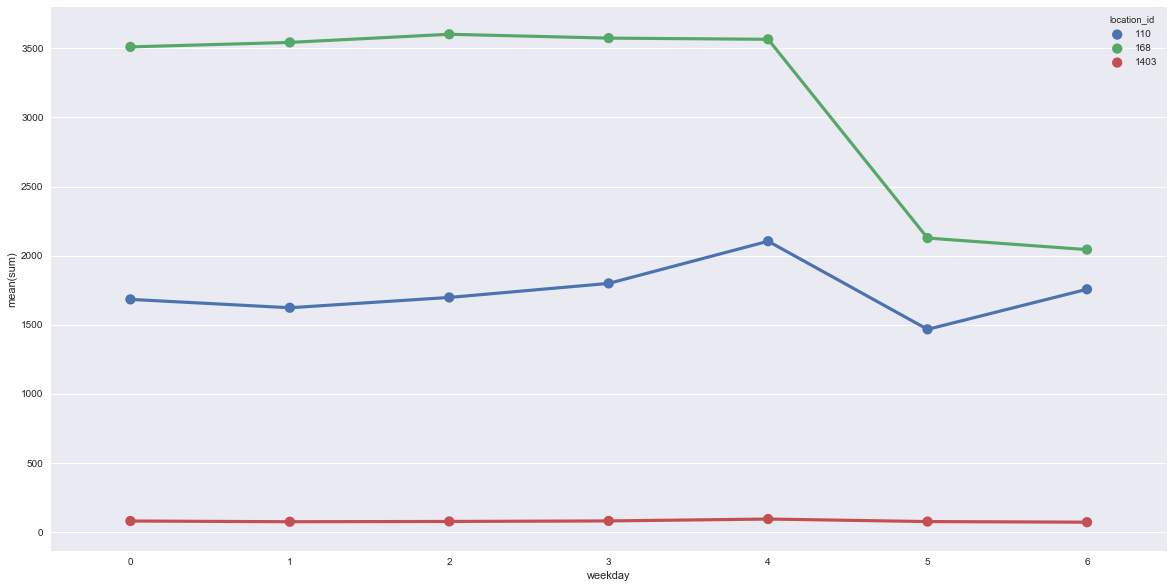

In [26]:
# compare average week volumes in each location
week_avg = df.groupby(by=["weekday", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="weekday", y="sum", hue="location_id", data=week_avg, ax=ax)

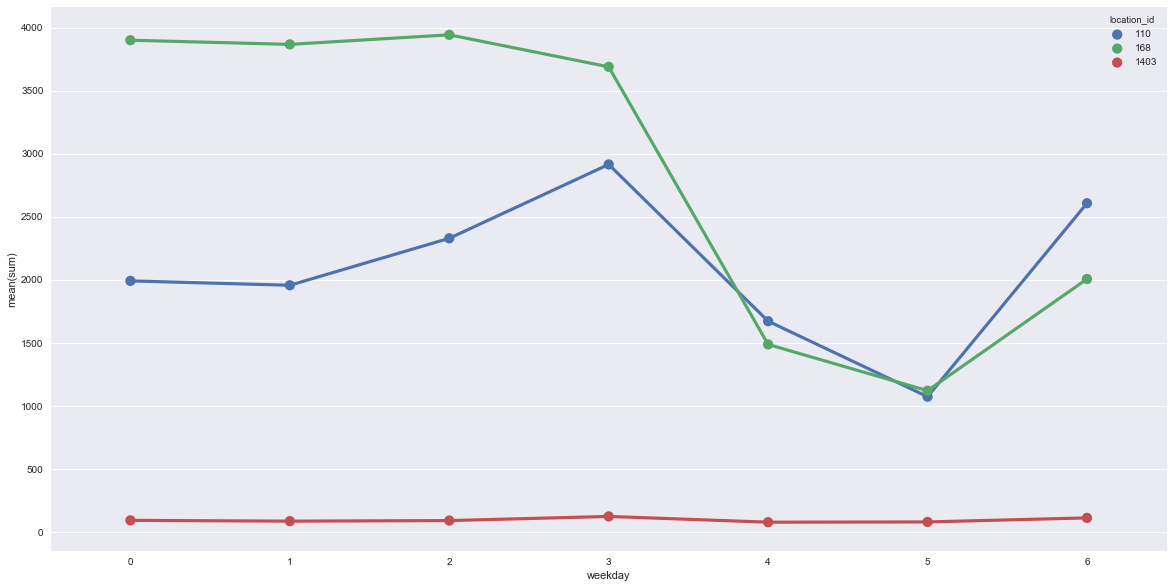

In [27]:
# compare midsummer week volumes in each location
midsummer = df[df["midsummer_week"] == True]
midsummer = midsummer.groupby(by=["weekday", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="weekday", y="sum", hue="location_id", data=midsummer, ax=ax)

In [28]:
data = df[(df.vehicle_type == "11 HA-PA") | (df.vehicle_type == "12 KAIP") | (df.vehicle_type == "13 Linja-autot")]
data = data.drop(["location_name", "date", "sum"], axis=1)
def convert_categorical_to_dummies(data, col):
    dummies = pd.get_dummies(data[col])
    concat = pd.concat([data, dummies], axis=1)
    concat = concat.drop([col], axis=1)
    return concat

categorical_fields = ["vehicle_type", "location_id", "direction", "weekday", "week"]

for col in categorical_fields:
    data = convert_categorical_to_dummies(data, col)

In [34]:
# X and y 
y_cols = ["hour_{}".format(n) for n in range(1,25)]
X = data.drop(y_cols, axis=1)
y = data[y_cols]

# normalize X
#min_max_scaler = preprocessing.MinMaxScaler()
#X = pd.DataFrame(min_max_scaler.fit_transform(X.values))

# train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30)

X_train.head()

,rain,temperature,year,midsummer_week,11 HA-PA,12 KAIP,13 Linja-autot,110,168,1403,...,44,45,46,47,48,49,50,51,52,53
7608,0.6,5.4,2016,False,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8322,3.2,2.7,2013,False,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100111,27.5,22.7,2010,False,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38618,0.7,11.8,2017,False,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
83054,9.3,7.4,2011,False,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
regr = ensemble.RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
regr.score(X_test, y_test)

0.97378642853894715

In [40]:
pd.DataFrame(y_pred).head()
#y_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,137.9,67.3,38.1,30.8,80.9,330.4,1495.6,1864.6,1590.6,1089.4,...,1537.3,2618.8,3064.8,2033.3,1321.6,1067.0,885.3,539.0,373.0,266.4
1,0.2,0.0,0.4,0.5,1.6,2.7,2.9,5.9,6.0,8.9,...,4.1,6.3,6.7,4.7,4.0,3.3,2.4,1.6,2.8,1.5
2,3.5,1.8,0.0,1.1,0.4,1.8,5.2,6.7,5.6,5.6,...,4.5,3.2,5.1,5.7,4.0,4.7,2.4,1.8,2.3,2.1
3,1.0,0.4,0.2,1.0,1.1,0.7,0.8,1.6,2.7,4.0,...,6.2,4.3,4.5,5.6,2.1,4.9,3.9,2.0,1.5,2.1
4,1.8,1.7,1.1,0.9,2.4,4.8,4.6,6.5,6.6,7.9,...,9.1,9.5,8.9,10.7,5.4,5.8,3.1,3.0,3.9,2.4


In [14]:
pd.DataFrame(y_test).head(1)

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
40459,52.0,39.0,37.0,50.0,106.0,429.0,1471.0,2578.0,2171.0,1181.0,...,1333.0,2059.0,2126.0,1459.0,1043.0,756.0,647.0,488.0,210.0,147.0
